In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## Task 1 -> Data Collection and Preprocessing
- Import and examine the dataset
- Do we have any missing values?


In [217]:
#read the file
df = pd.read_csv("data/ProjectDataSet.csv")
print("bbb")


bbb


In [218]:
df.head()

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   YEAR                                                                 8976 non-null   int64 
 1   Borough                                                              6048 non-null   object
 2   Neighborhood (U.H.F)                                                 8976 non-null   object
 3   SEX                                                                  8976 non-null   object
 4   RACE/ETHNICITY                                                       8976 non-null   object
 5   TOTAL NUMBER OF HIV DIAGNOSES                                        8970 non-null   object
 6   HIV DIAGNOSES PER 100,000 POPULATION                                 8902 non-null   object
 7   TOTAL NUMBER OF

In [220]:
#sort the values by Neighborhood
#df_sorted = df.sort_values(by='RACE/ETHNICITY')
#df_sorted #RACE/ETHNICITY get grouped by the same name

Since the TOTAL NUMBER OF AIDS DIAGNOSES column is currently of type object but contains numerical values, we will:
- Create an array to hold all the columns that we plan to convert to numerical values.
- Create an array to hold all the categorical columns
- Convert it to a numeric type using the coerce method.


In [221]:
numerical_columns = [
    'TOTAL NUMBER OF HIV DIAGNOSES', 
    'HIV DIAGNOSES PER 100,000 POPULATION', 
    'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 
    'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES', 
    'TOTAL NUMBER OF AIDS DIAGNOSES',  
    'AIDS DIAGNOSES PER 100,000 POPULATION'
]


In [222]:
categorical_columns = ['Neighborhood (U.H.F)','SEX','RACE/ETHNICITY']      

In [223]:
# Convert columns to numeric
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
numerical_columns


['TOTAL NUMBER OF HIV DIAGNOSES',
 'HIV DIAGNOSES PER 100,000 POPULATION',
 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
 'TOTAL NUMBER OF AIDS DIAGNOSES',
 'AIDS DIAGNOSES PER 100,000 POPULATION']

In [224]:
df[numerical_columns].describe()

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
count,8960.000000,8892.000000,8972.000000,7081.000000,8963.000000,8895.000000
mean,21.010268,25.241048,3.924209,15.869044,13.517684,16.194570
std,106.363909,43.975241,19.705491,21.498990,70.037027,31.764976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.300000,0.000000,11.100000,1.000000,4.400000
75%,12.000000,33.200000,2.000000,23.500000,7.000000,19.800000
max,3353.000000,821.600000,680.000000,100.000000,2611.000000,565.500000


## Take Care of missing data
1. Replace numerical missing data with mean values.
2. Replace categorical missing data with mode values
   

In [225]:
#check for any missing values
df.isnull().any()

YEAR                                                                   False
Borough                                                                 True
Neighborhood (U.H.F)                                                   False
SEX                                                                    False
RACE/ETHNICITY                                                         False
TOTAL NUMBER OF HIV DIAGNOSES                                           True
HIV DIAGNOSES PER 100,000 POPULATION                                    True
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           True
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     True
TOTAL NUMBER OF AIDS DIAGNOSES                                          True
AIDS DIAGNOSES PER 100,000 POPULATION                                   True
dtype: bool

In [226]:
#Group columns that have null values into a series
nanColumns= pd.Series(df.columns[df.isnull().any()])
print(nanColumns)

0                                              Borough
1                        TOTAL NUMBER OF HIV DIAGNOSES
2                 HIV DIAGNOSES PER 100,000 POPULATION
3        TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES
4    PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AM...
5                       TOTAL NUMBER OF AIDS DIAGNOSES
6                AIDS DIAGNOSES PER 100,000 POPULATION
dtype: object


In [227]:
#count NaN values in each column
count_NaN_values = df[nanColumns].isnull().sum()
print(count_NaN_values)


Borough                                                                2928
TOTAL NUMBER OF HIV DIAGNOSES                                            16
HIV DIAGNOSES PER 100,000 POPULATION                                     84
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             4
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1895
TOTAL NUMBER OF AIDS DIAGNOSES                                           13
AIDS DIAGNOSES PER 100,000 POPULATION                                    81
dtype: int64


In [228]:
#retrieve the mean 
mean_values = df[numerical_columns].mean(axis=0, skipna=True, numeric_only=True)
print("Mean: ", mean_values)




Mean:  TOTAL NUMBER OF HIV DIAGNOSES                                          21.010268
HIV DIAGNOSES PER 100,000 POPULATION                                   25.241048
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           3.924209
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    15.869044
TOTAL NUMBER OF AIDS DIAGNOSES                                         13.517684
AIDS DIAGNOSES PER 100,000 POPULATION                                  16.194570
dtype: float64


In [229]:
# replace '0' values with 'nan'
df[numerical_columns] = df[numerical_columns].replace(0, np.nan)

# print the first 20 rows of data
print(df.head(20))
print(df.isnull().sum())

    YEAR Borough           Neighborhood (U.H.F)     SEX  \
0   2010     NaN                     Greenpoint    Male   
1   2011     NaN         Stapleton - St. George  Female   
2   2010     NaN               Southeast Queens    Male   
3   2012     NaN                 Upper Westside  Female   
4   2013     NaN                    Willowbrook    Male   
5   2013     NaN       East Flatbush - Flatbush    Male   
6   2013     NaN       East Flatbush - Flatbush  Female   
7   2013     NaN               Southwest Queens  Female   
8   2012     NaN           Fordham - Bronx Park    Male   
9   2010     NaN           Flushing - Clearview     All   
10  2012     NaN                     Greenpoint  Female   
11  2012     NaN              Chelsea - Clinton  Female   
12  2012     NaN  Coney Island - Sheepshead Bay    Male   
13  2010     NaN               Southwest Queens  Female   
14  2013     NaN                        Unknown    Male   
15  2013     NaN                    Willowbrook    Male 

In [230]:
# Fill null values with mean values of numerical columns
for column in numerical_columns:
    df[column] = df[column].fillna(mean_values[column])

print("Final count of missing values:\n", df.isnull().sum())

Final count of missing values:
 YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             0
HIV DIAGNOSES PER 100,000 POPULATION                                      0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES       0
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                     0
dtype: int64


In [231]:
df.drop(columns=['Borough'], inplace=True)
print(df.head())
print(df.isnull().sum())

df

   YEAR    Neighborhood (U.H.F)     SEX   RACE/ETHNICITY  \
0  2010              Greenpoint    Male            Black   
1  2011  Stapleton - St. George  Female  Native American   
2  2010        Southeast Queens    Male              All   
3  2012          Upper Westside  Female          Unknown   
4  2013             Willowbrook    Male          Unknown   

   TOTAL NUMBER OF HIV DIAGNOSES  HIV DIAGNOSES PER 100,000 POPULATION  \
0                       6.000000                            330.400000   
1                      21.010268                             25.241048   
2                      23.000000                             25.400000   
3                      21.010268                             25.241048   
4                      21.010268                             25.241048   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                       3.924209   
1                                       3.924209   
2                                     

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6.000000,330.400000,3.924209,15.869044,5.000000,275.30000
1,2011,Stapleton - St. George,Female,Native American,21.010268,25.241048,3.924209,15.869044,13.517684,16.19457
2,2010,Southeast Queens,Male,All,23.000000,25.400000,5.000000,21.700000,14.000000,15.40000
3,2012,Upper Westside,Female,Unknown,21.010268,25.241048,3.924209,15.869044,13.517684,16.19457
4,2013,Willowbrook,Male,Unknown,21.010268,25.241048,3.924209,15.869044,13.517684,16.19457
...,...,...,...,...,...,...,...,...,...,...
8971,2021,Willowbrook,Male,Asian/Pacific\nIslander,2.000000,24.200000,3.924209,15.869044,13.517684,16.19457
8972,2021,Willowbrook,Male,Black,21.010268,25.241048,3.924209,15.869044,13.517684,16.19457
8973,2021,Willowbrook,Male,Latino/Hispanic,1.000000,18.200000,3.924209,15.869044,13.517684,16.19457
8974,2021,Willowbrook,Male,Other/Unknown,21.010268,25.241048,3.924209,15.869044,1.000000,153.00000


## Encode Categorical data
### Independent Variable
1. Encode and Display 3 categorical Independent Variable

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

#### get dummies methods



In [234]:
#1. get dummies method for all categorical Indepedent features
df_encoded = pd.get_dummies(df, columns=['SEX'], drop_first=True)  # This will create a new column like 'SEX_Male'



## Dependent Variable
1. Encode and Display 1 categorical Dependent Variable

In [237]:
# Create a new binary column in the encoded DataFrame
df_encoded['label'] = np.where(df_encoded['SEX_Male'] == 1, 1, 0)


## Split the dataset into training and testing sets

In [263]:
X = df_encoded[['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES', 'SEX_Male']]
y = df_encoded['TOTAL NUMBER OF HIV DIAGNOSES']


In [264]:
X.shape

(8976, 2)

In [265]:
y.shape

(8976,)

In [266]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

print('Split X: ',trainX.shape, testX.shape)
print('Split Y: ',trainY.shape, testY.shape)

Split X:  (7180, 2) (1796, 2)
Split Y:  (7180,) (1796,)


## Feature Scaling

#### Standardized Scaling

In [267]:
original = df[numerical_columns]
# Standardize dataframe and return as an array
standardizedArray = preprocessing.scale(original)

# Convert standardized array to dataframe 'standardized'
standardized = pd.DataFrame(standardizedArray, columns=numerical_columns)

In [268]:
standardized

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,-0.212852,7.374914,-0.113801,-0.360843,-0.204346,8.675912
1,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
2,-0.051363,-0.215942,-0.058217,0.012821,-0.074304,-0.257640
3,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
4,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
...,...,...,...,...,...,...
8971,-0.250850,-0.245808,-0.113801,-0.360843,-0.081273,-0.230328
8972,-0.070264,-0.219898,-0.113801,-0.360843,-0.081273,-0.230328
8973,-0.260349,-0.395136,-0.113801,-0.360843,-0.081273,-0.230328
8974,-0.070264,-0.219898,-0.113801,-0.360843,-0.262142,4.472090


#### Normalized Scaling

In [269]:
# Normalize dataframe and return as an array
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df[numerical_columns])

# Convert normalized array to dataframe 'normalized'
normalized = pd.DataFrame(normalizedArray, columns=numerical_columns)
normalized

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,0.001492,0.401924,0.004307,0.129980,0.001533,0.486553
1,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
2,0.006563,0.030561,0.005891,0.190279,0.004981,0.026716
3,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
4,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
...,...,...,...,...,...,...
8971,0.000298,0.029100,0.004307,0.129980,0.004796,0.028122
8972,0.005970,0.030368,0.004307,0.129980,0.004796,0.028122
8973,0.000000,0.021795,0.004307,0.129980,0.004796,0.028122
8974,0.005970,0.030368,0.004307,0.129980,0.000000,0.270170


# Task 2 -> Data Visualization

In [270]:

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [271]:
#we calculate the skew values for each numerical column defined before
#lambda function allows us to define a simple operation without needing a separate function. 
#It takes each column (x) and returns its skewness using the .skew() method.
skew_values = df[numerical_columns].apply(lambda x: x.skew())
print(skew_values)

TOTAL NUMBER OF HIV DIAGNOSES                                          18.089082
HIV DIAGNOSES PER 100,000 POPULATION                                    5.217254
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          19.480943
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     3.585788
TOTAL NUMBER OF AIDS DIAGNOSES                                         20.134881
AIDS DIAGNOSES PER 100,000 POPULATION                                   6.171833
dtype: float64


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   RACE/ETHNICITY                                                       8976 non-null   object 
 3   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 4   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 5   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 6   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  8976 non-null   float64
 7   TOTAL 

#### Calculate feature correlations and display a correlation heat-map

In [273]:
print(df.dtypes)


YEAR                                                                     int64
Neighborhood (U.H.F)                                                    object
RACE/ETHNICITY                                                          object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
SEX_Female                                                                bool
SEX_Male                                                                  bool
log_concurrent                                                         float64
log_diagnosesAIDS                                   

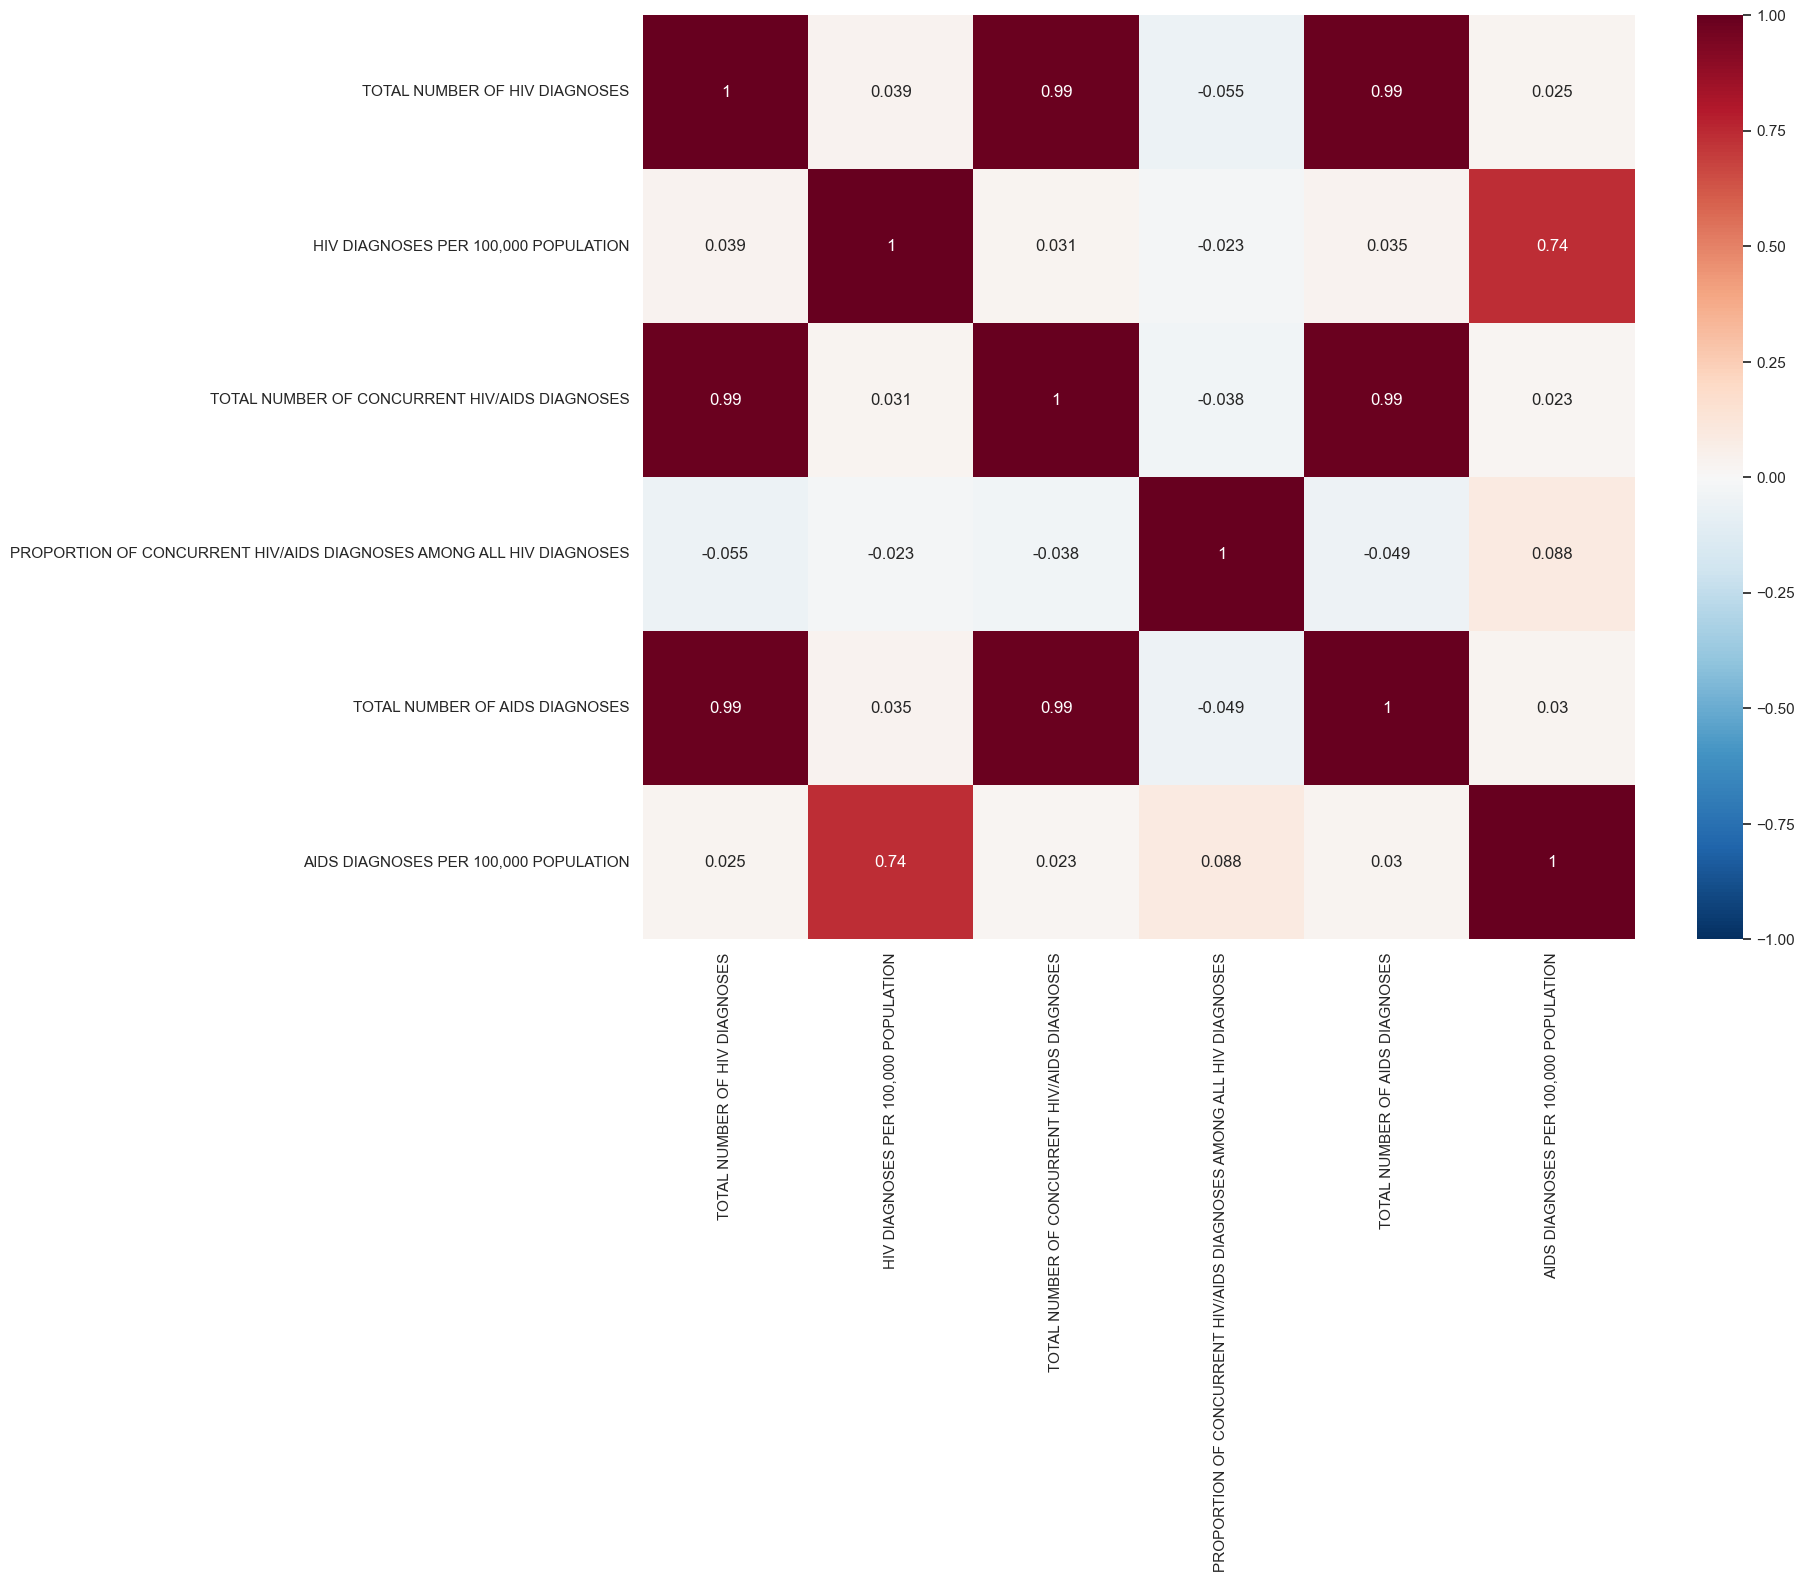

In [274]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df[numerical_columns].corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


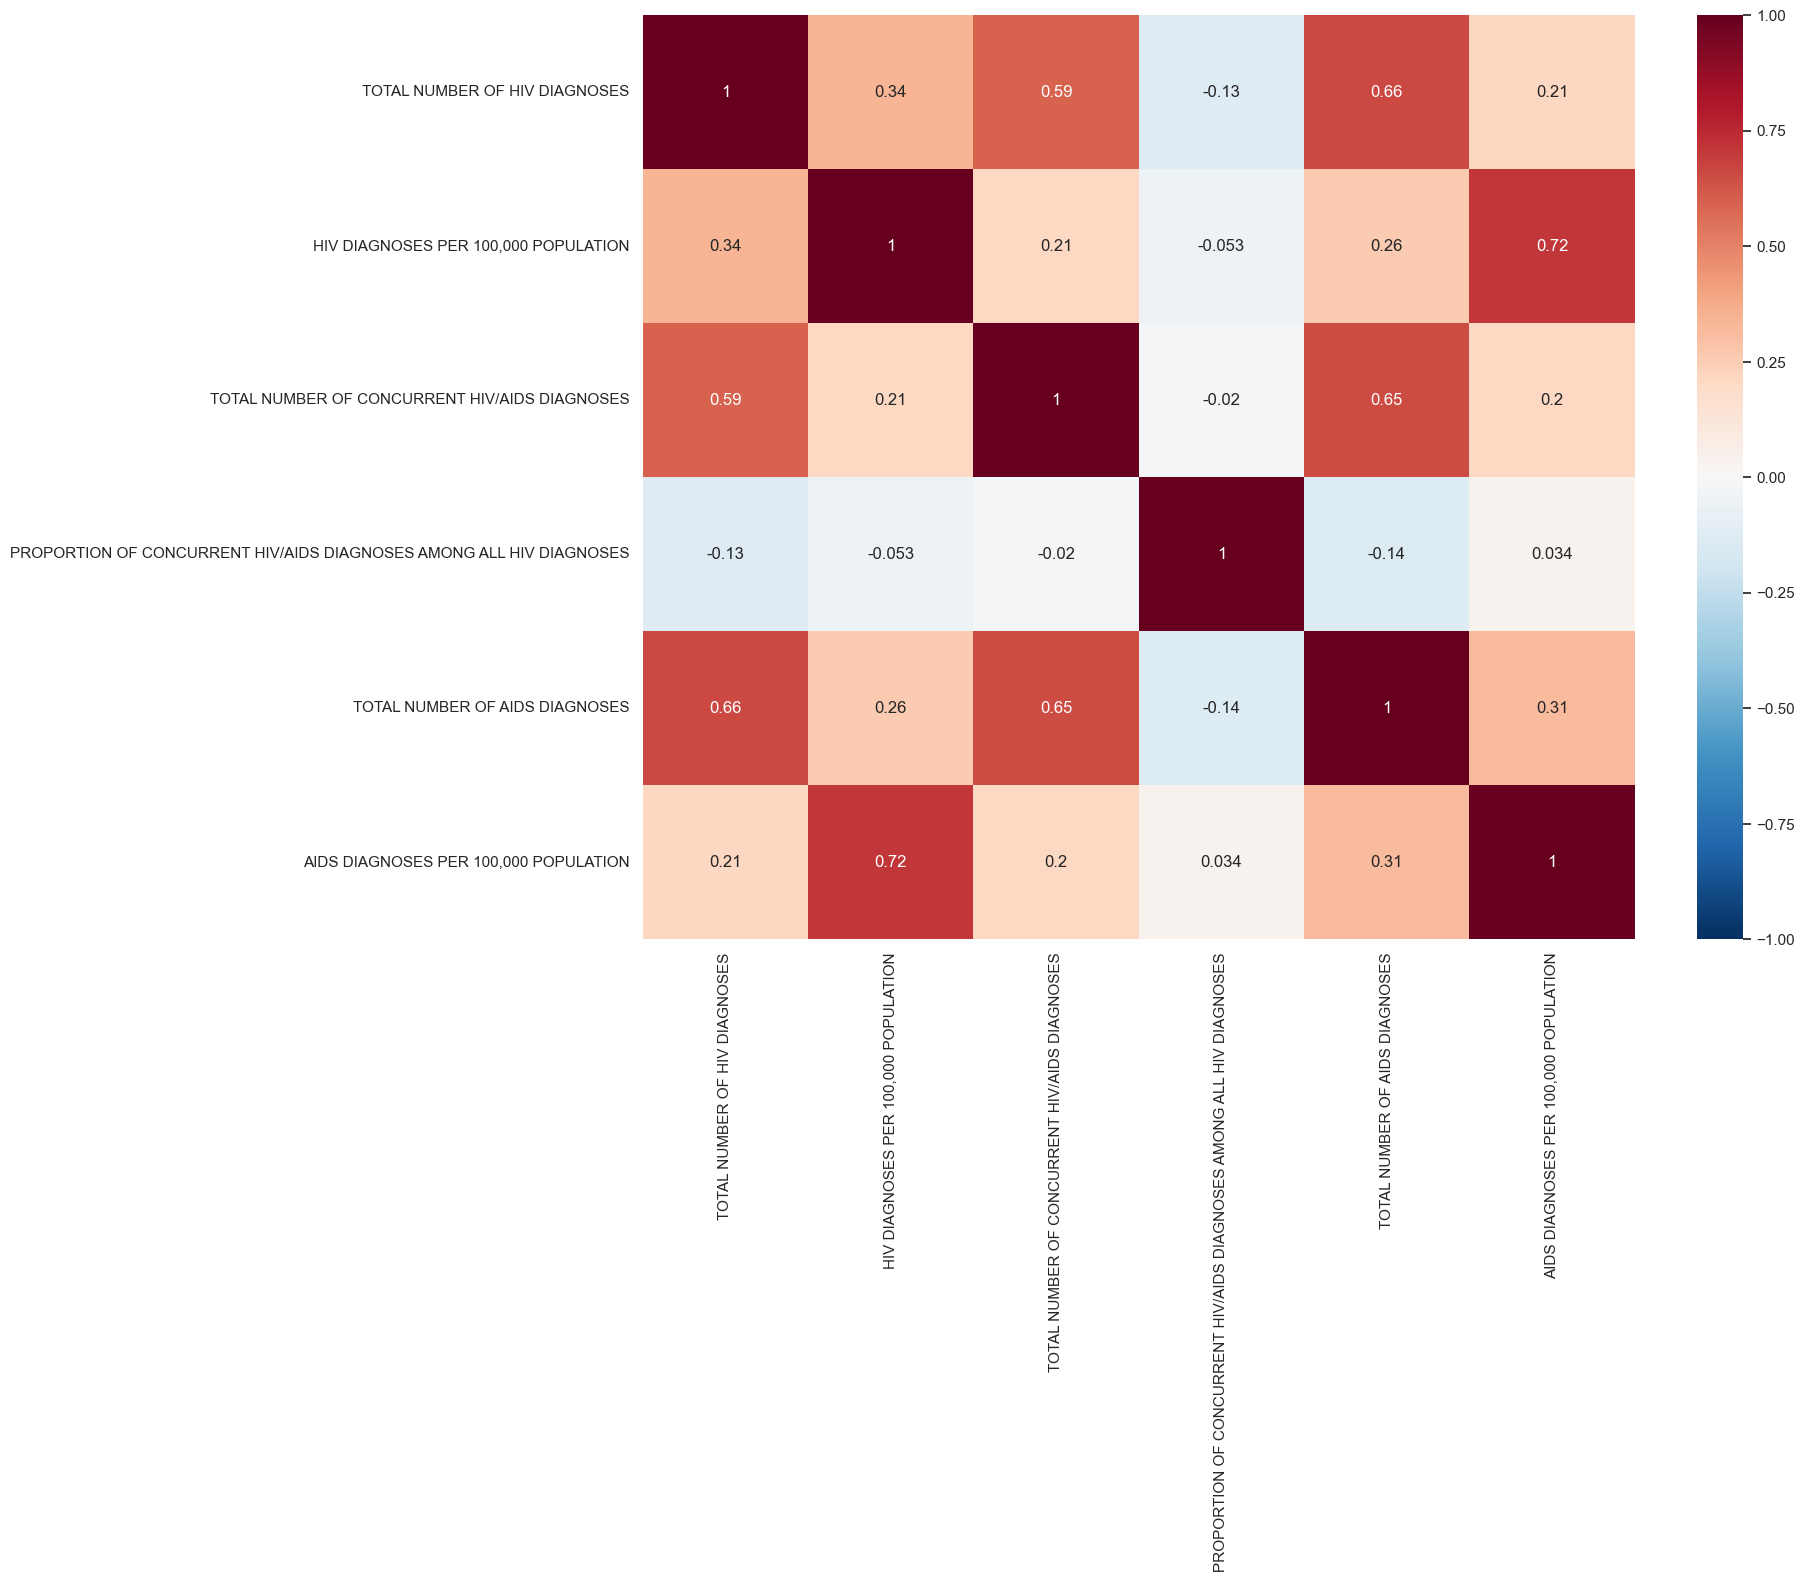

In [275]:
corr = df[numerical_columns].corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Saving figure to: data/graphs/TOTAL NUMBER OF HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/HIV DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF CONCURRENT HIV_AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/PROPORTION OF CONCURRENT HIV_AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/AIDS DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.


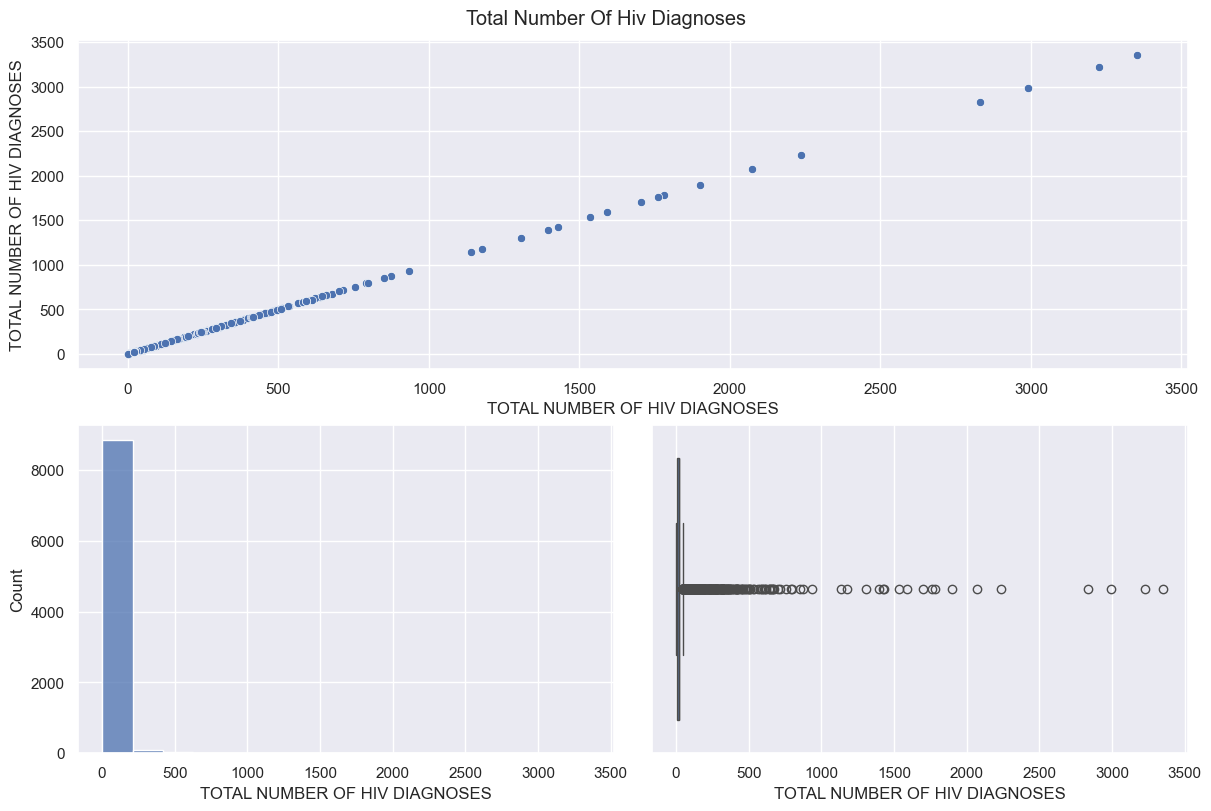

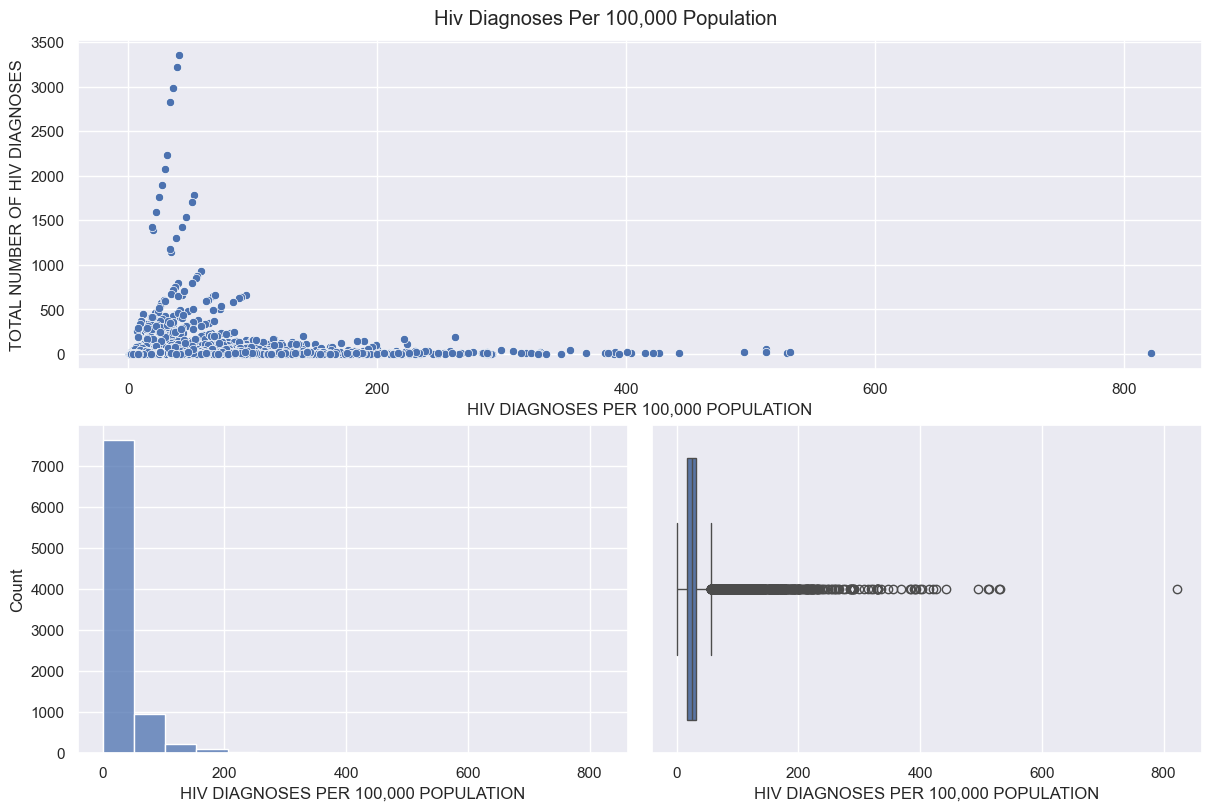

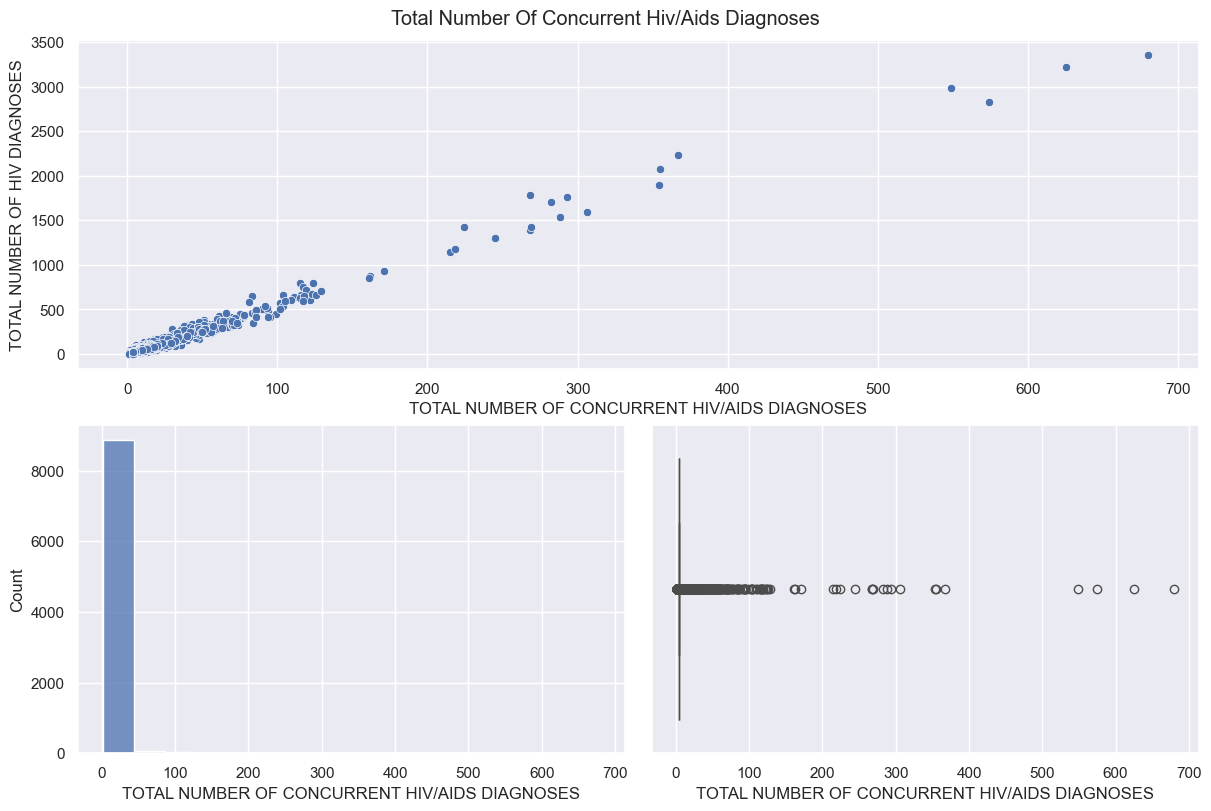

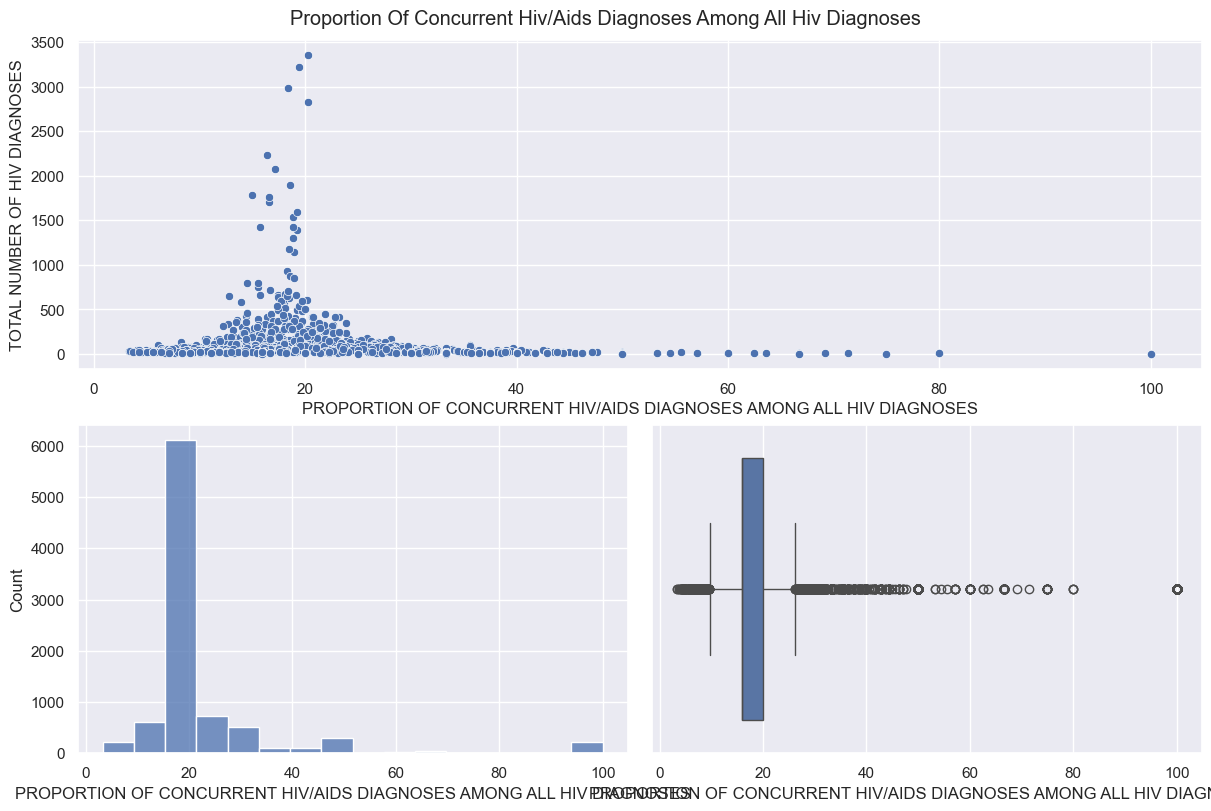

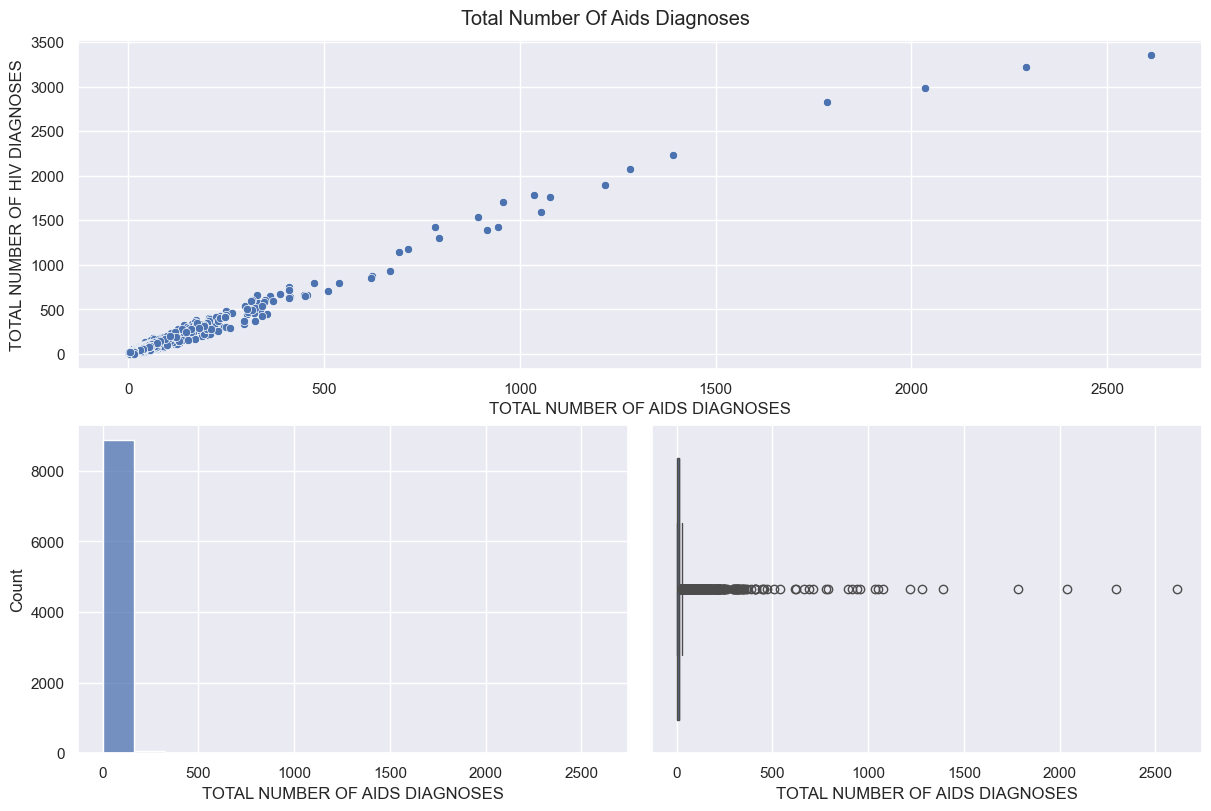

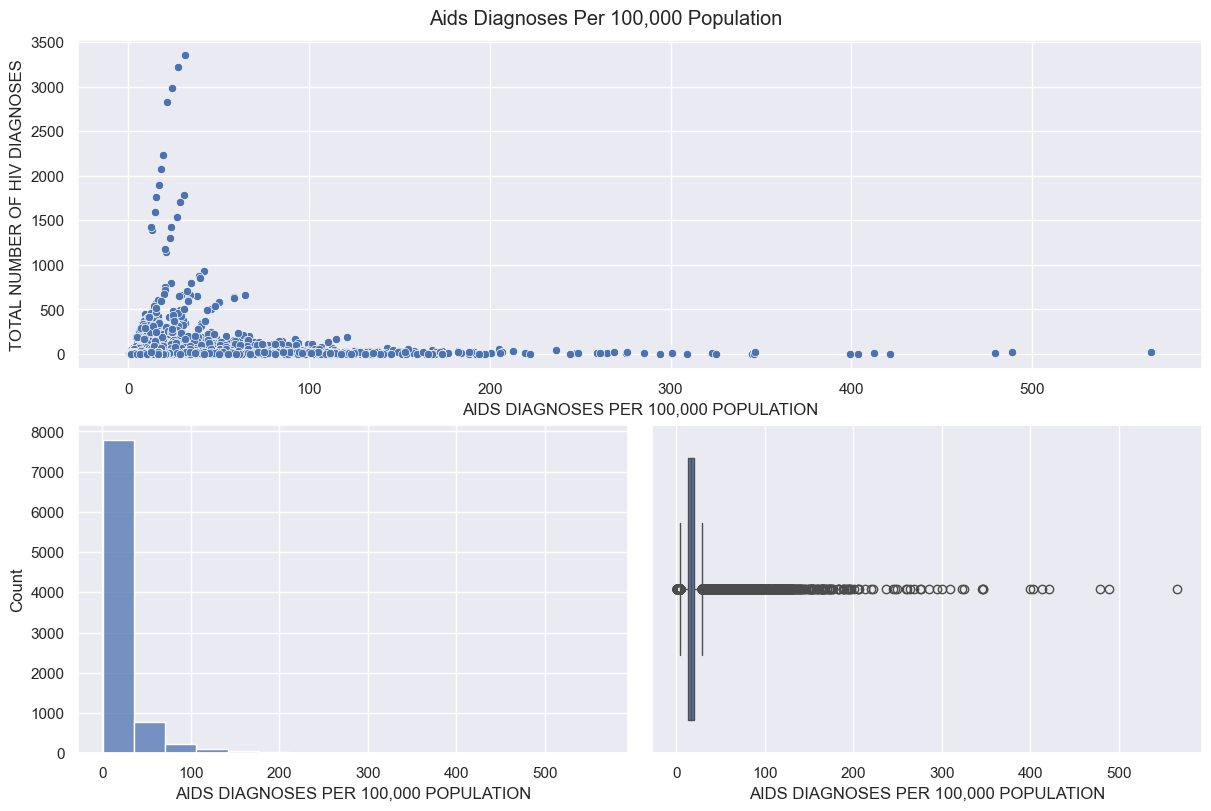

In [276]:
output_dir = 'data/graphs/'
#Function to sanitize filenames by replacing invalid characters, LIKE THE PROPORTION COLUMN AND CONCURRENT COLUMN
def sanitize_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')  # Replace invalid characters

columns = df[numerical_columns].columns
for x_value in columns:
    sanitized_x_value = sanitize_filename(x_value)  # Clean the column name for the file name
    t_value = x_value.title()  # Convert column name to title case
    fig = plt.figure(figsize=(12, 8), constrained_layout=True) 
    gs = GridSpec(2, 2, figure=fig)
    
    save_path = os.path.join(output_dir, f"{sanitized_x_value}.png")
    print('Saving figure to:', save_path)

    # Create sub plots
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df, x=x_value, y='TOTAL NUMBER OF HIV DIAGNOSES', ax=ax1)
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value, data=df, bins=16, ax=ax2)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df, x=x_value, orient='h', ax=ax3)

    fig.suptitle(t_value)
    fig.savefig(save_path, format='png')
    print('Figure saved successfully.')

In [277]:
abs_corr = df[numerical_columns].corr()['TOTAL NUMBER OF HIV DIAGNOSES'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='TOTAL NUMBER OF HIV DIAGNOSES', axis=1, inplace=True)

In [278]:
abs_corr

TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0.989571
TOTAL NUMBER OF AIDS DIAGNOSES                                         0.988883
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0.055142
HIV DIAGNOSES PER 100,000 POPULATION                                   0.038838
AIDS DIAGNOSES PER 100,000 POPULATION                                  0.025342
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

In [279]:
#Choose the highest coefficient which means the stronger correlation between total number of hiv diagnoses and the other variables
concurrentHIV_skew = df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].skew()
diagnose_AIDS_skew= df['TOTAL NUMBER OF AIDS DIAGNOSES'].skew()


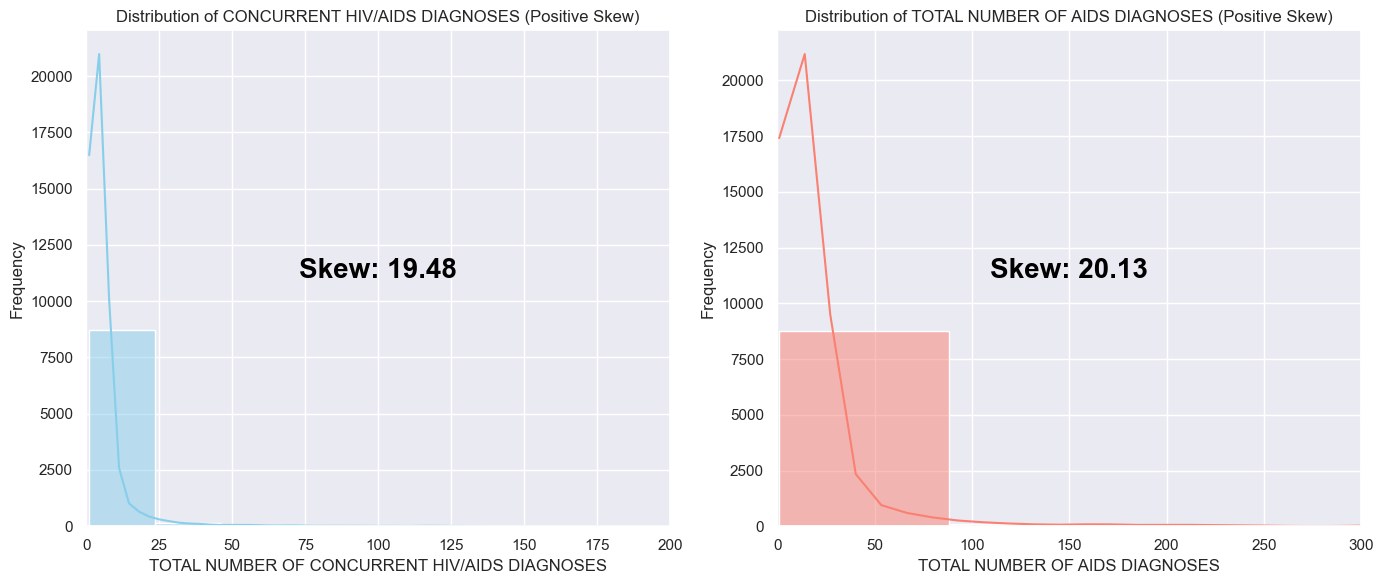

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES
sns.histplot(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'], kde=True, ax=ax[0], color='skyblue', bins=30)
ax[0].set_title('Distribution of CONCURRENT HIV/AIDS DIAGNOSES (Positive Skew)', fontsize=12)
ax[0].set_xlabel('TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES')
ax[0].set_ylabel('Frequency')
ax[0].text(0.5, 0.5, f'Skew: {concurrentHIV_skew:.2f}', transform=ax[0].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=20)

# Set x-axis limits for zoom
ax[0].set_xlim(left=0, right=200)  # Adjust these values based on your data

# Histogram for HIV DIAGNOSES PER 100,000 POPULATION
sns.histplot(df['TOTAL NUMBER OF AIDS DIAGNOSES'], kde=True, ax=ax[1], color='salmon', bins=30)
ax[1].set_title('Distribution of TOTAL NUMBER OF AIDS DIAGNOSES (Positive Skew)', fontsize=12)
ax[1].set_xlabel('TOTAL NUMBER OF AIDS DIAGNOSES')
ax[1].set_ylabel('Frequency')
ax[1].text(0.5, 0.5, f'Skew: {diagnose_AIDS_skew:.2f}', transform=ax[1].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=20)

# Set x-axis limits for zoom
ax[1].set_xlim(left=0, right=300)  # Adjust these values based on your data

plt.tight_layout()
plt.show()

#### Data Transformations ####
- Parametric tests expect a normal distribution
- Transformations can reduce the impact of outliers on models 

In [281]:
print(df[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'TOTAL NUMBER OF AIDS DIAGNOSES']].describe())
#since we have some 0's in our dataset we add a constant of 1
df['log_concurrent'] = np.log(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'] + 1)
df['log_diagnosesAIDS'] = np.log(df['TOTAL NUMBER OF AIDS DIAGNOSES'] + 1)


       TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
count                                    8976.000000   
mean                                        6.126767   
std                                        19.355548   
min                                         1.000000   
25%                                         3.924209   
50%                                         3.924209   
75%                                         3.924209   
max                                       680.000000   

       TOTAL NUMBER OF AIDS DIAGNOSES  
count                     8976.000000  
mean                        19.142522  
std                         69.212677  
min                          1.000000  
25%                          4.000000  
50%                         13.517684  
75%                         13.517684  
max                       2611.000000  


In [282]:
concurrentHIV_skew = df['log_concurrent'].skew()
diagnose_AIDS_skew = df['log_diagnosesAIDS'].skew()
print("Concurrent Diagnoses Skewness after Log Transformation:", concurrentHIV_skew)
print(" TOTAL NUMBER OF AIDS DIAGNOSES after Log Transformation:", diagnose_100_HIV_skew)

Concurrent Diagnoses Skewness after Log Transformation: 1.9872139363321322
 TOTAL NUMBER OF AIDS DIAGNOSES after Log Transformation: 5.217254482387774


# Task 3 -> Regression Analysis

In [298]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   RACE/ETHNICITY                                                       8976 non-null   object 
 3   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 4   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 5   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 6   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  8976 non-null   float64
 7   TOTAL 

In [301]:
model = LinearRegression()
model.fit(trainX, trainY)



LinearRegression()

In [302]:
y_pred = model.predict(testX)


In [303]:
print(trainX.columns)


Index(['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES', 'SEX_Male'], dtype='object')


In [305]:
r2 = r2_score(testY, y_pred)
print(f'R-squared value: {r2}')


R-squared value: 0.001228573121784482


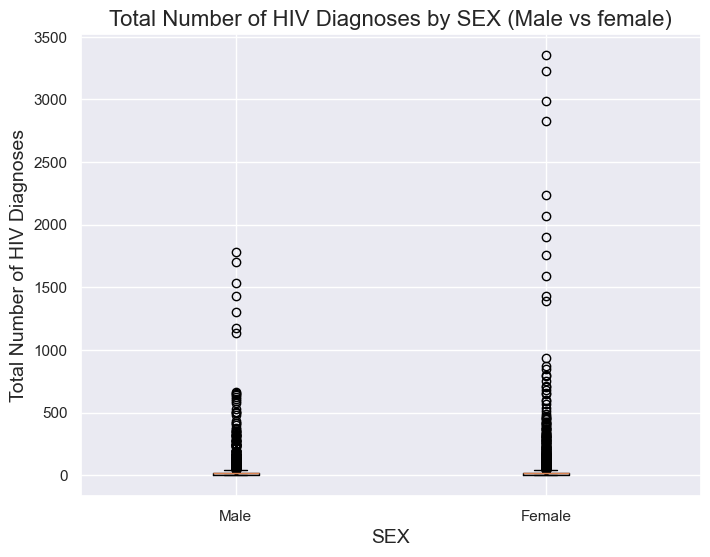

In [306]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
r_squared = linModel.score(X, y)
print(f"Proportion of variation 
explained by the model (R^2): {r_squared:.4f}")


SyntaxError: EOL while scanning string literal (2244778427.py, line 4)

In [295]:
# Make a prediction for a specific case
y_pred = linModel.predict(X)
print(
    "Predicted Total Number of HIV Diagnoses for an individual with 20 concurrent HIV cases who is Black:\n",
    round(y_pred[0][0], 2),  # Rounding for better readability
    "diagnoses"
)


Predicted Total Number of HIV Diagnoses for an individual with 20 concurrent HIV cases who is Black:
 30.53 diagnoses


In [296]:
# Assuming your DataFrame is named df and the target column is 'TOTAL NUMBER OF HIV DIAGNOSES'
Q1 = df['TOTAL NUMBER OF HIV DIAGNOSES'].quantile(0.25)
Q3 = df['TOTAL NUMBER OF HIV DIAGNOSES'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['TOTAL NUMBER OF HIV DIAGNOSES'] >= lower_bound) & 
                 (df['TOTAL NUMBER OF HIV DIAGNOSES'] <= upper_bound)]

# Check the shape of the cleaned DataFrame
print("Original data shape:", df.shape)
print("Cleaned data shape:", df_cleaned.shape)


Original data shape: (8976, 13)
Cleaned data shape: (8178, 13)


In [307]:
# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R²
r2 = r2_score(y, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R²: {r2}')


ValueError: Found input variables with inconsistent numbers of samples: [8976, 1796]